# INITIALIZATION EXAMPLE


[[[[[6, 7, 0], [0, 6, 6], [0, 0, 0]], [[6, 6, 7, 7, 0, 0], [6, 6, 7, 7, 0, 0], [0, 0, 6, 6, 6, 6], [0, 0, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]], [[[1, 0, 4], [0, 4, 0], [0, 1, 0]], [[1, 1, 0, 0, 4, 4], [1, 1, 0, 0, 4, 4], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0]]], [[[3, 2, 0], [0, 7, 3], [0, 0, 0]], [[3, 3, 3, 2, 2, 2, 0, 0, 0], [3, 3, 3, 2, 2, 2, 0, 0, 0], [3, 3, 3, 2, 2, 2, 0, 0, 0], [0, 0, 0, 7, 7, 7, 3, 3, 3], [0, 0, 0, 7, 7, 7, 3, 3, 3], [0, 0, 0, 7, 7, 7, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]], [[[0, 8, 0], [0, 6, 6], [9, 8, 0]], [[0, 0, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 6, 6, 6, 6, 6, 6], [0, 0, 0, 6, 6, 6, 6, 6, 6], [0, 0, 0, 6, 6, 6, 6, 6, 6], [9, 9, 9, 8, 8, 8, 0, 0, 0], [9, 9, 9, 8, 8, 8, 0, 0, 0], [9, 9, 9, 8, 8, 8, 0, 0, 0]]], [[[4, 0, 3], [2, 2, 0], [0, 0, 8]], [[4, 4, 4, 4, 0, 0, 0, 0, 3, 3, 3, 3], [4, 4

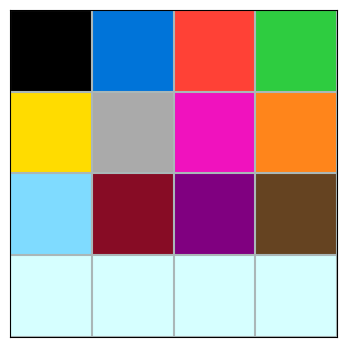

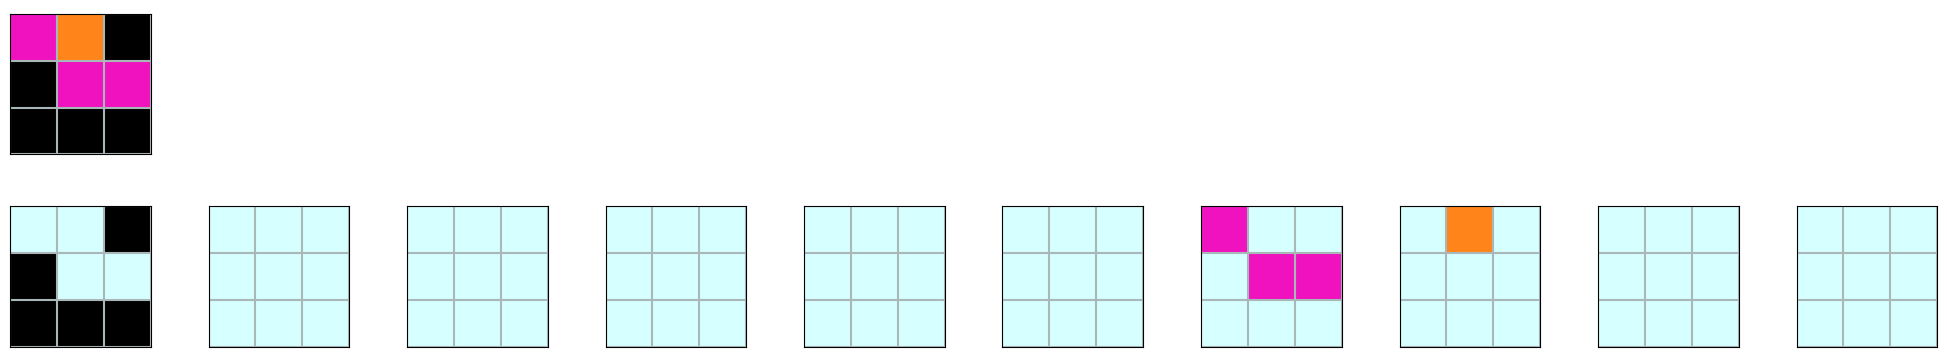

In [1]:
import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

from basics.ARCLOADER import *
from basics.VISUALIZATION import *

arc = ARCDataset()
## list format (recommended) #########################################################################################
# type = 'train' or 'eval' / form = 'dict' or 'list' / shuffle = True or False / jcode = True or False
tasks, j_codes = arc.load_data(type = 'train', form = 'list', shuffle = False, jcode = True)

x = 25     # 0 - 399      (task number)
tt = 0    # 0 or 1       (train or test)
p = 0     # 0 - max pair (pair number)
io = 0    # 0 or 1       (input or output)

# print(tasks) - if form = 'list' / [x][0 or 1][p][0 or 1][row][col]
example_task = tasks[x]
example_pair = tasks[x][tt][p]
example_grid = tasks[x][tt][p][io]
print(example_task)


## json codes #########################################################################################
# print(j_codes)
print(arc.itoj(0, j_codes))
print(arc.jtoi('5c2c9af4', j_codes))


## visualization #######################################################################################################
color_pallette = [[0,1,2,3], [4,5,6,7], [8,9,10,11], [-1,-1,-1,-1]] # 3 additional colors 10 and 11 and 12(-1) [12 means null]
plot_data(color_pallette)


## tencolor split #######################################################################################################
plot_data(example_grid, keyword = 'tencolorsplit')



# ARC task data structure in five levels, their properties, and visualization.
### Task, Pair, Grid, Object, Pixel

#### you can see all the components in ARC task. Also, you can search the components by their id, and visualize them.

In [2]:
from basics.ARCLOADER import *
from basics.VISUALIZATION import *

# from DSL.dsl import *
from DSL.dsl2 import *
# from DSL.hodel_utils import *
# from DSL.property_DSL import *
# from DSL.util_DSL import *
# from DSL.transformation_DSL import *

# from KG_definition.node import *
# from KG_definition.new import *
# from KG_definition.edge import *

# from KG_construction.construction import *

from components import *

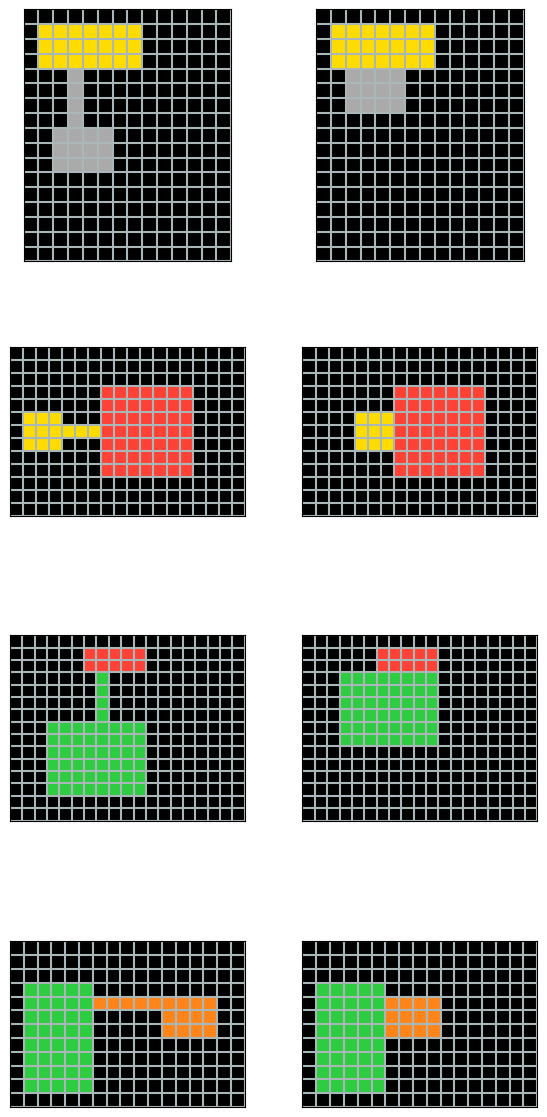

In [3]:
arc = ARCDataset()
tasks, j_codes = arc.load_data(type = 'train', form = 'list', shuffle = False, jcode = True)

t = 399    # 0 - 399      (task number)
tt = 0    # 0 or 1       (train or test)
p = 2     # 0 - max pair (pair number)
io = 1   # 0 or 1       (input or output)

example_task = tasks[t]
example_pair = tasks[t][tt][p]
example_grid = tasks[t][tt][p][io]

plot_data(example_task, keyword = None)


In [4]:
tasks = tasks

entire_single_components = []
task_list = []

for t in range(len(tasks)):
    ttt = TASK(tasks, t)

    entire_single_components.append(ttt)
    task_list.append(ttt)
    pair_list = []

    for p in range(len(ttt.example_pairs)):
        ppp = PAIR(ttt, t, p)

        entire_single_components.append(ppp)
        pair_list.append(ppp)

        grid_list = []

        for g in range(len(ppp.grids)):
            ggg = GRID(ppp, t, p, g)

            entire_single_components.append(ggg)
            grid_list.append(ggg)

            object_list = []

            for o in range(len(ggg.objects)):
                ooo = OBJECT(ggg, t, p, g, o)

                entire_single_components.append(ooo)
                object_list.append(ooo)

                pixel_list = []
                for x in range(len(ooo.pixels)):
                    xxx = PIXEL(ooo, t, p, g, o, x)

                    entire_single_components.append(xxx)
                    pixel_list.append(xxx)

                ooo.pixel_list = pixel_list
            ggg.object_list = object_list
        ppp.grid_list = grid_list
    ttt.pair_list = pair_list



14
(10, 10)


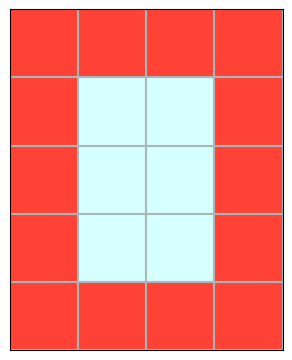

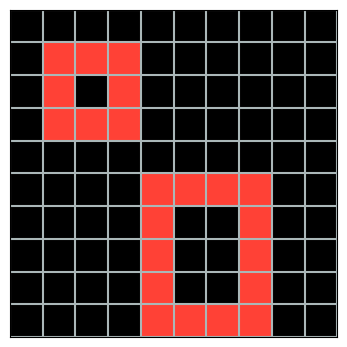

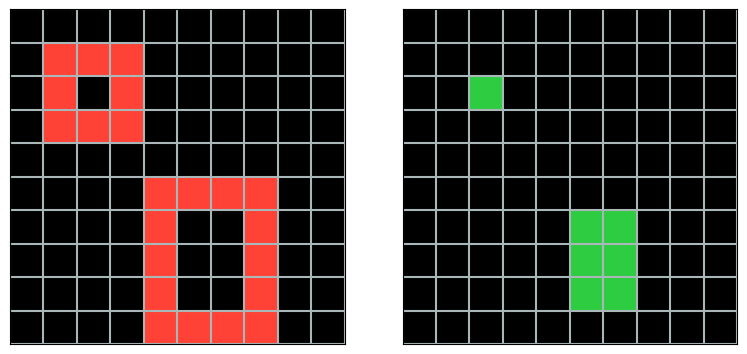

In [38]:
t = 24 # 33
p = 0
g = 0
o = None
x = None

for component in entire_single_components:
    if component.id == (t, p, g, o, x):
        # print(component.object_list[0].type)
        # print(component.object_list[0].view)
        # print("#########")
        # print(component.objects)
        # print(component.object_colorgrids)
        # print("#########")
        # print(component.object_list[0].shape)
        # print(component.object_list[0].area)

        print(component.object_list[3].area)
        print(component.object_list[3].ancestor.size)

        plot_data(component.object_list[3].view, keyword = None)
        plot_data(component.object_list[3].ancestor.view, keyword = None)
        plot_data(component.object_list[3].ancestor.ancestor.view, keyword = None)


        



In [ ]:
# print(len(entire_single_components))
# print(len(task_list))
# print(len(pair_list))
# print(len(grid_list))
# print(len(object_list))
# print(len(pixel_list))

# print(task_list[399].pair_list[0].grid_list[0].object_list[0].pixel_list[0].colcoord)

# plot_data(task_list[399].pair_list[0].grid_list[0].object_list[0].pixel_list[0].view, keyword = None)
# print(task_list[399].pair_list[0].grid_list[0].object_list[0].type)
# plot_data(task_list[399].view, keyword = None)

